# Ames Neighborhood Analysis

In [231]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [232]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

In [233]:
housing = pd.read_csv("./data/Ames_Housing_Price_Data.csv", index_col=0)
realestate = pd.read_csv('./data/Ames_Real_Estate_Data.csv', index_col=0)
clean_df = pd.read_pickle('clean_df.pkl')
lat_long_df = pd.read_pickle('clean_Res_latlog.pkl')

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [234]:
clean_df.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,Utilities,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,CentralAir,Electrical,BedroomAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,Fence,MoSold,Neighborhood_y,highschool_dist,college_dist,latitude,longitude,SalePriceLog,BsmtSF_Fin,HalfBath2,BsmtFullBath2,BsmtHalfBath2,bathroom,GrPorchArea,HasPorch,HasDeck,Pool_YN,BeenRemod,Shed,Gar2
0,856,126000,0.0,7890,1,1,1,4,0,6,6,1939,3,3,3.0,3.0,856.0,3,1,0,2,1,4.0,1,0,1,3.0,0,3,7,1.748507,0.467930,42.018564,-93.651619,5,1,0.0,0.6,0.0,1.6,166,1,0,0,1,0,0
1,1049,139500,42.0,4235,1,1,1,5,0,5,5,1984,4,3,4.0,3.0,1049.0,3,1,0,2,0,0.0,0,1,1,3.0,0,2,6,1.852690,0.749722,42.024855,-93.663671,5,1,0.0,0.6,0.0,2.6,105,1,0,0,0,0,0
4,1039,114000,80.0,8146,1,1,1,4,1,4,8,1900,4,4,2.0,3.0,405.0,4,1,0,2,0,0.0,1,0,1,3.0,0,5,5,1.152991,2.080107,42.037391,-93.612207,5,0,0.0,0.0,0.0,1.0,279,1,0,0,1,0,0
5,1665,227000,70.0,8400,1,1,1,4,1,8,6,2001,4,3,4.0,3.0,810.0,5,1,0,3,0,0.0,0,1,1,3.0,0,11,14,0.316567,1.611707,42.044554,-93.631818,5,1,0.5,0.6,0.0,3.1,45,1,0,0,0,0,0
6,1922,198500,64.0,7301,1,1,1,4,1,7,5,2003,4,3,0.0,0.0,0.0,5,1,0,4,1,5.0,1,1,1,3.0,0,7,6,2.477665,1.298492,42.019009,-93.672987,5,0,0.0,0.0,0.0,3.0,177,1,0,0,0,0,0


In [235]:
lat_long_df.Neighborhood_y.value_counts()

N Ames     408
CollgCr    236
OldTown    206
Edwards    163
Somerst    143
Gilbert    143
Sawyer     139
NW Ames    123
NRidgHt    121
SawyerW    112
Mitchel    103
BrkSide    103
Crawfor     92
NoRidge     67
IDOT&RR     58
Timber      52
S&W ISU     41
ClearCr     39
MeadowV     34
Br'Dale     29
Stonebr     23
Blmngtn     23
Veenker     23
NoPkVil     22
HaydnLk     20
Bluestm     10
Greens       8
Name: Neighborhood_y, dtype: int64

### Neighborhood Analysis

Many home buyers purchase their homes based on their neighborhood preferences and the location. Study the statistics on all the **Ames** neighborhoods, including prices, price/area, lot area, gross living area, built year, the ratios of one-story homes, the lot utility rate (how much of the lot is utilized to build the house), various quality/condition metrics, house styles, etc. Please depict a story of the urban development of **Ames** and relate it to the **Ames** house prices.

To get familiar with the various **Ames** neighborhoods and the ratings of the public schools, visit the map tab of [realtor.com](https://www.realtor.com/realestateandhomes-search/North-Ames_Ames_IA?view=map). While there are many housing info web sites, **realtor.com** uses a neighborhood system which is more compatible with the one used in the dataset. Getting the long-lat coordinates of the $2500$ houses also helps to pin-point the relative geographic locations of the neighborhoods.

Consider the following questions:


- What types of dwelling are popular in **Ames**? How about their popularities in the different neighborhoods?



In [236]:
lat_long_df.head(1)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_x,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Neighborhood_y,ClassPr_S,SchD_S,TxD_S,address_lat_log,highschool_dist,college_dist,latitude,longitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,S&W ISU,RESIDENTIAL,1.0,1.0,"(42.01856448979592, -93.65161918367347)",1.748507,0.46793,42.018564,-93.651619


In [237]:

# 11 HouseStyle - CHANGE to binary 0 =ranch, 1 = colonial 
lat_long_df.HouseStyle = lat_long_df.HouseStyle.replace({'1.5Unf':0,'1.5Fin':0, 'SFoyer':1, 'SLvl':1, '1Story':0, '2.5Unf':1, '2Story':1, '2.5Fin':1})


In [244]:
lat_long_df.HouseStyle.sum()/2559

0.3841344275107464

In [245]:
lat_long_df.HouseStyle.mean()

0.3841344275107464

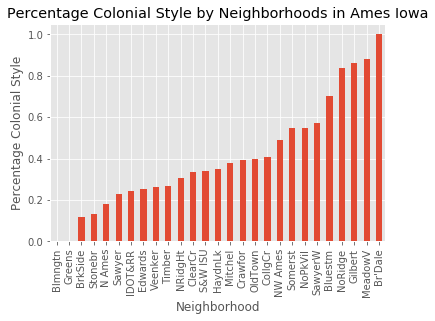

In [255]:
x1 = lat_long_df.groupby('Neighborhood_y')['HouseStyle'].mean().sort_values(ascending=True)
x1.plot(kind ='bar')
plt.title('Percentage Colonial Style by Neighborhoods in Ames Iowa')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage Colonial Style')
plt.show()

In [256]:
x1

Neighborhood_y
Blmngtn    0.000000
Greens     0.000000
BrkSide    0.116505
Stonebr    0.130435
N Ames     0.178922
Sawyer     0.230216
IDOT&RR    0.241379
Edwards    0.251534
Veenker    0.260870
Timber     0.269231
NRidgHt    0.305785
ClearCr    0.333333
S&W ISU    0.341463
HaydnLk    0.350000
Mitchel    0.378641
Crawfor    0.391304
OldTown    0.398058
CollgCr    0.406780
NW Ames    0.487805
Somerst    0.545455
NoPkVil    0.545455
SawyerW    0.571429
Bluestm    0.700000
NoRidge    0.835821
Gilbert    0.860140
MeadowV    0.882353
Br'Dale    1.000000
Name: HouseStyle, dtype: float64

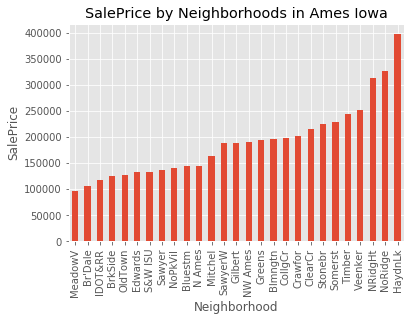

In [257]:
x2 = lat_long_df.groupby('Neighborhood_y')['SalePrice'].mean().sort_values(ascending=True)
x2.plot(kind ='bar')
plt.title('SalePrice by Neighborhoods in Ames Iowa')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()

In [258]:
df_d = lat_long_df.loc[(lat_long_df['college_dist']<6000)]

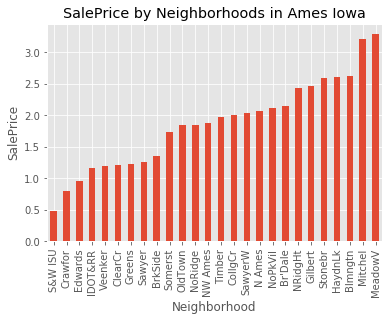

In [259]:
x3 = df_d.groupby('Neighborhood_y')['college_dist'].mean().sort_values(ascending=True)
x3.plot(kind ='bar')
plt.title('SalePrice by Neighborhoods in Ames Iowa')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()

## Linear Regression
- Does the price sensitivity on quality depend on the neighborhood?  


In [146]:
df = lat_long_df.groupby('Neighborhood_y').agg({'OverallQual':"mean", "SalePrice":"mean"})

df

,OverallQual,SalePrice
Neighborhood_y,,
Blmngtn,7.130435,196237.173913
Bluestm,6.600000,143590.000000
Br'Dale,5.724138,106094.827586
BrkSide,5.145631,126029.854369
ClearCr,6.051282,216020.512821
CollgCr,6.627119,198133.169492
Crawfor,6.152174,202075.782609
Edwards,5.000000,132040.619632
Gilbert,6.503497,189439.867133


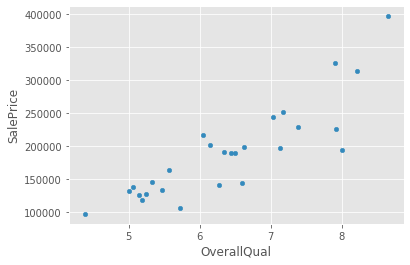

In [260]:
df[['OverallQual', 'SalePrice']].plot(kind='scatter', x='OverallQual', y='SalePrice')


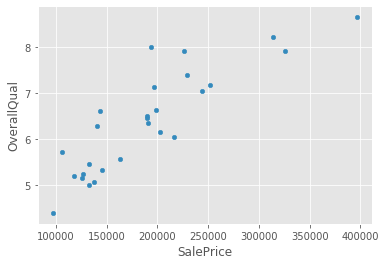

In [261]:
df[['SalePrice', 'OverallQual']].plot(kind='scatter', x='SalePrice', y='OverallQual')


In [184]:
df1 = lat_long_df.groupby('Neighborhood_y').agg({'OverallQual':"mean", "SalePriceLog":"mean"})

df1

,OverallQual,SalePriceLog
Neighborhood_y,,
Blmngtn,7.130435,5.288968
Bluestm,6.600000,5.149105
Br'Dale,5.724138,5.022891
BrkSide,5.145631,5.083428
ClearCr,6.051282,5.315475
CollgCr,6.627119,5.283647
Crawfor,6.152174,5.286711
Edwards,5.000000,5.097390
Gilbert,6.503497,5.272375


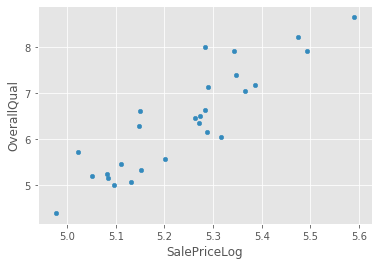

In [186]:
df1[['SalePriceLog', 'OverallQual']].plot(kind='scatter', x='SalePriceLog', y='OverallQual')


In [92]:
lat_long_df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_x,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Neighborhood_y,ClassPr_S,SchD_S,TxD_S,address_lat_log,highschool_dist,college_dist,latitude,longitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,S&W ISU,RESIDENTIAL,1.0,1.0,"(42.01856448979592, -93.65161918367347)",1.748507,0.467930,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,Edwards,RESIDENTIAL,1.0,1.0,"(42.024855315930424, -93.66367099341755)",1.852690,0.749722,42.024855,-93.663671
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,OldTown,RESIDENTIAL,1.0,1.0,"(42.03739146938776, -93.61220695918368)",1.152991,2.080107,42.037391,-93.612207
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,NW Ames,RESIDENTIAL,1.0,1.0,"(42.04455376067282, -93.63181831620726)",0.316567,1.611707,42.044554,-93.631818
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,908128060.0,4003 MARIGOLD DR,Edwards,RESIDENTIAL,1.0,1.0,"(42.01900877172312, -93.67298690279817)",2.477665,1.298492,42.019009,-93.672987


In [93]:
lat_long_df.shape

(2559, 92)

(array([  2.,  11.,  29., 186., 748., 668., 525., 290.,  80.,  20.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

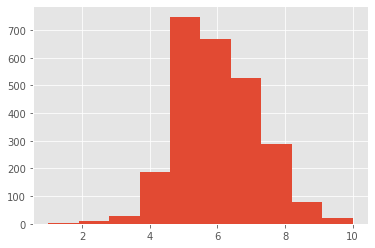

In [96]:
lat_long_df.OverallQual.value_counts()
plt.hist(lat_long_df['OverallQual'], bins= 10)

In [107]:
OverallQual = lat_long_df['OverallQual']
OverallCond = lat_long_df["OverallCond"]

In [199]:
# X = lat_long_df['OverallQual']
# X = np.array(sorted(X))
# X.reshape(-1,1)
# X

array([ 1,  1,  2, ..., 10, 10, 10])

In [202]:
lat_long_df = lat_long_df.replace(np.nan, 0)


In [297]:
from sklearn import linear_model
import numpy as np

ols = linear_model.LinearRegression()

X = lat_long_df[['OverallQual']]
Y = lat_long_df['SalePrice']

ols.fit(X, Y) 


print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, Y)))

Intercept: -72441.797109
Coefficients: [41227.87835869]
R^2: 0.629840


In [217]:
from sklearn.feature_selection import f_regression

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X, Y)
print(lm.score(X, Y))

lm.fit(np.log10(X), np.log10(Y))
lm.score(np.log10(X), np.log10(Y))


0.6220204113917102


0.6326132768813948

In [262]:
lat_long_df["SalePrice"].mean()

178814.299335678

In [265]:
#check for outliers in lat_long_df['SalePrice']

#removing outliers from GrLivArea & LotArea & TotalBsmtSF
lat_long_df = lat_long_df.loc[(lat_long_df['SalePrice'] < 500000)]



In [266]:
lat_long_df['SalePrice'].mean()

176900.26737338045

In [269]:
Affluent = lat_long_df[lat_long_df["SalePrice"] > 176900]
Poor = lat_long_df[lat_long_df["SalePrice"] < 176900]

In [272]:
Affluent.shape

(1016, 92)

In [273]:
Poor.shape

(1531, 92)

In [292]:
Affluent['OverallQual'].mean()

7.1486220472440944

In [293]:
Poor['OverallQual'].mean()

5.317439581972567

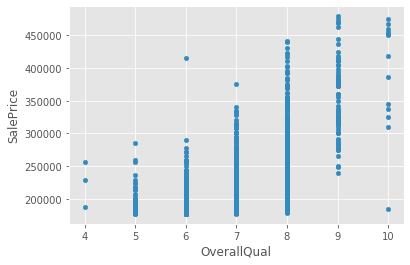

In [291]:
Affluent[['OverallQual', 'SalePrice',]].plot(kind='scatter', x='OverallQual', y='SalePrice')


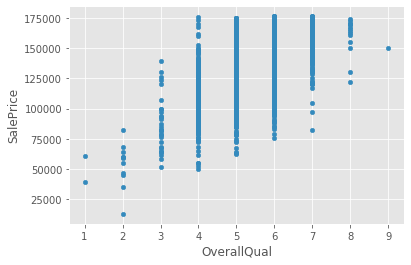

In [289]:
Poor[['OverallQual', 'SalePrice',]].plot(kind='scatter', x='OverallQual', y='SalePrice')


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


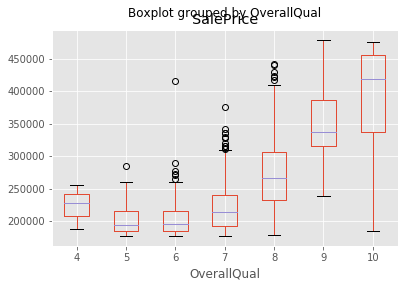

In [294]:
Affluent.boxplot(by= 'OverallQual', column ='SalePrice')


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


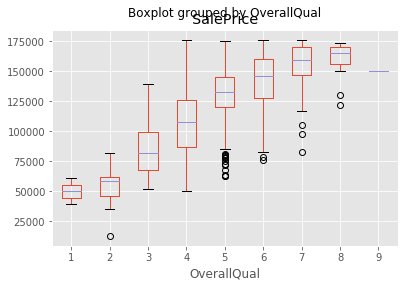

In [295]:
Poor.boxplot(by= 'OverallQual', column ='SalePrice')


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


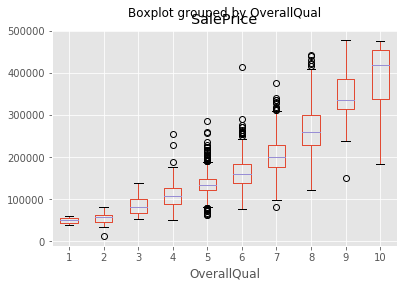

In [296]:
lat_long_df.boxplot(by= 'OverallQual', column ='SalePrice')


In [285]:
from sklearn import linear_model
import numpy as np

ols = linear_model.LinearRegression()

X = Affluent[['OverallQual']]
Y = Affluent['SalePrice']

ols.fit(X, Y) 

print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, Y)))

Intercept: -38005.641850
Coefficients: [39256.44005498]
R^2: 0.431923


In [286]:
from sklearn import linear_model
import numpy as np

ols = linear_model.LinearRegression()

X = Poor[['OverallQual']]
Y = Poor['SalePrice']

ols.fit(X, Y) 


print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, Y)))

Intercept: 48901.162451
Coefficients: [15869.24324874]
R^2: 0.329320


## Expanded Analysis

- Given that **Ames** has about $30\%$ poverty rate, and that **ISU** is the largest employer of the city, identify the affluent and poor neighborhoods based on your data analysis and the external information. Identify the neighborhoods which offer a convenient job commute.


In [168]:
lat_long_df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood_x,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GeoRefNo,Prop_Addr,Neighborhood_y,ClassPr_S,SchD_S,TxD_S,address_lat_log,highschool_dist,college_dist,latitude,longitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,909176150.0,436 HAYWARD AVE,S&W ISU,RESIDENTIAL,1.0,1.0,"(42.01856448979592, -93.65161918367347)",1.748507,0.467930,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,Edwards,RESIDENTIAL,1.0,1.0,"(42.024855315930424, -93.66367099341755)",1.852690,0.749722,42.024855,-93.663671
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,OldTown,RESIDENTIAL,1.0,1.0,"(42.03739146938776, -93.61220695918368)",1.152991,2.080107,42.037391,-93.612207
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,NW Ames,RESIDENTIAL,1.0,1.0,"(42.04455376067282, -93.63181831620726)",0.316567,1.611707,42.044554,-93.631818
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,908128060.0,4003 MARIGOLD DR,Edwards,RESIDENTIAL,1.0,1.0,"(42.01900877172312, -93.67298690279817)",2.477665,1.298492,42.019009,-93.672987


In [169]:
lat_long_df['SalePriceLog'] = np.log10(clean_df['SalePrice'])


In [175]:
lat_long_df['SalePriceLog'].mean()

5.219029700264828

In [176]:
df_d = lat_long_df.loc[(lat_long_df['college_dist']<6000)]



In [183]:
df_d = df_d.groupby('Neighborhood_y').agg({'SalePriceLog':"mean", "college_dist": "mean"})\
      .sort_values(by = 'college_dist', ascending=True)
df_d

,SalePriceLog,college_dist
Neighborhood_y,,
S&W ISU,5.114640,0.482104
Crawfor,5.284682,0.795599
Edwards,5.096775,0.952438
IDOT&RR,5.044491,1.164229
Veenker,5.385793,1.199396
ClearCr,5.316645,1.219619
Greens,5.284149,1.228375
Sawyer,5.130131,1.262698
BrkSide,5.083428,1.349933


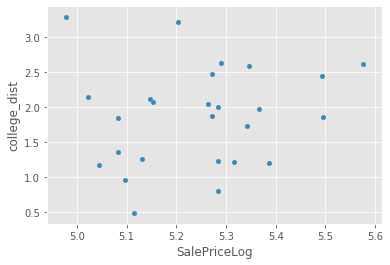

In [180]:
df_d[['SalePriceLog', 'college_dist']].plot(kind='scatter', x='SalePriceLog', y='college_dist')


In [153]:
df1 = lat_long_df.groupby('Neighborhood_y').agg({"SalePrice":"mean", "college_dist": "mean"})\
      .sort_values(by = 'SalePrice', ascending=False)
df1['Neighborhood'] = df1.index
df1

,SalePrice,college_dist,Neighborhood
Neighborhood_y,,,
HaydnLk,396717.050000,1283.774902,HaydnLk
NoRidge,326114.298507,193.090488,NoRidge
NRidgHt,313662.495868,584.802443,NRidgHt
Veenker,251263.043478,1.199396,Veenker
Timber,243523.346154,1.968129,Timber
Somerst,228761.853147,180.941111,Somerst
Stonebr,225821.739130,559.620536,Stonebr
ClearCr,216020.512821,986.943399,ClearCr
Crawfor,202075.782609,279.388146,Crawfor


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


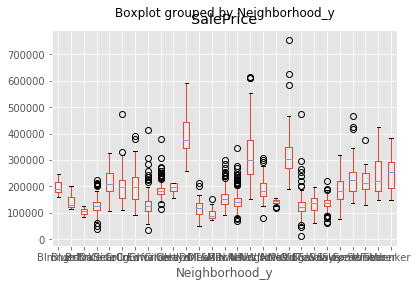

In [152]:
lat_long_df.boxplot(by= 'Neighborhood_y', column ='SalePrice')


- **Neighborhood Comps**: It is a very common practice for the home buyers to estimate the worth of the target home using the so-called 'neighborhood comp(atible)s.'
    - Using the nonlinear **KNN** (or its variant **RadiusNN**), rbf-kernel **SVR** or tree-based models, build a baseline neighborhood comp model based on the houses' long-lat coordinates (and maybe with the house-types). Apparently this naive nonlinear model does not offer the full story behind house pricing. Your goal is to build a secondary pricing model (using the house attributes) modeling the residuals of the neighborhood comp. By building an enhanced neighborhood comp model, you should be able to gauge its relevance in house pricing, as well as identify the complementary features which help improve the model.
    - Does your enhanced comps model offer valuable insights on the home buyers' purchase rationale?


# KNN

In [7]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
clean_df.shape

(2549, 47)

In [53]:
clean_df.columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'Utilities',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       'BedroomAbvGr', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'Fence', 'MoSold',
       'Neighborhood_y', 'highschool_dist', 'college_dist', 'latitude',
       'longitude', 'SalePriceLog', 'BsmtSF_Fin', 'HalfBath2', 'BsmtFullBath2',
       'BsmtHalfBath2', 'bathroom', 'GrPorchArea', 'HasPorch', 'HasDeck',
       'Pool_YN', 'BeenRemod', 'Shed', 'Gar2', 'SalePrice2'],
      dtype='object')

In [86]:
#removing outliers from GrLivArea & LotArea & TotalBsmtSF
clean_df = clean_df.loc[(clean_df['GrLivArea']<4000) & (clean_df['LotArea']<100000)\
                        & (clean_df['TotalBsmtSF']<3000) & (clean_df['SalePrice'] < 500000)]



In [313]:
clean_df.shape

(2549, 48)

In [314]:
import math
math.sqrt(2539)

50.38849074937649

In [34]:
clean_df['SalePriceLog'] = np.log10(clean_df['SalePrice'])
clean_df['SalePriceLog'] = clean_df['SalePriceLog'].astype(np.int64)

(array([ 233., 1587.,  543.,  136.,   40.]),
 array([ 12789., 106045., 199301., 292557., 385813., 479069.]),
 <a list of 5 Patch objects>)

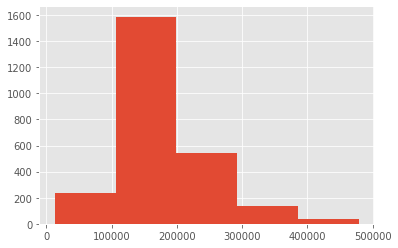

In [12]:
plt.hist(clean_df['SalePrice'], bins= 5)

In [87]:
clean_df['SalePrice'].mean()

176606.6486805829

In [298]:
clean_df['SalePrice2'] = clean_df.SalePrice.apply(lambda x: "Affluent" if x >= 176606 else("Poor"))


In [299]:
clean_df['SalePrice2'].value_counts()

Poor        1530
Affluent    1019
Name: SalePrice2, dtype: int64

In [301]:
#preprocessing
X = np.array([clean_df["latitude"], clean_df['longitude'], clean_df['HouseStyle']])
             
y = clean_df["SalePrice2"]

In [302]:
X.shape

(3, 2549)

In [303]:
y.shape

(2549,)

In [304]:
X = X.transpose()

In [305]:
X.shape

(2549, 3)

In [306]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# X_train, X_test, y_train, y_test,  = train_test_split(X,y,test_size=1/3, random_state=0) 


In [307]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [332]:
#training
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=4)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [333]:
#predict
y_pred = classifier.predict(X_test)

In [334]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[189  23]
 [ 55 243]]
              precision    recall  f1-score   support

    Affluent       0.77      0.89      0.83       212
        Poor       0.91      0.82      0.86       298

    accuracy                           0.85       510
   macro avg       0.84      0.85      0.85       510
weighted avg       0.86      0.85      0.85       510



In [321]:
#Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

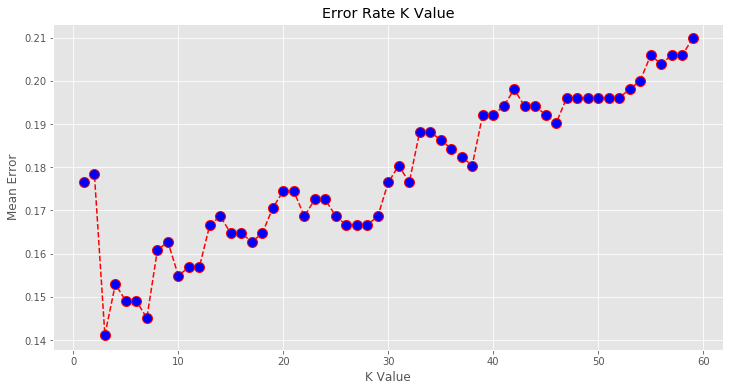

In [322]:
#plot error
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')